In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
#This options enable us to change the image to produce augmented images
#check Iamge data documentation for more
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [4]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/cat'))

In [5]:
image_path = 'data/dogs-vs-cats/train/cat/' + chosen_image

In [6]:
image = np.expand_dims(plt.imread(image_path),0)

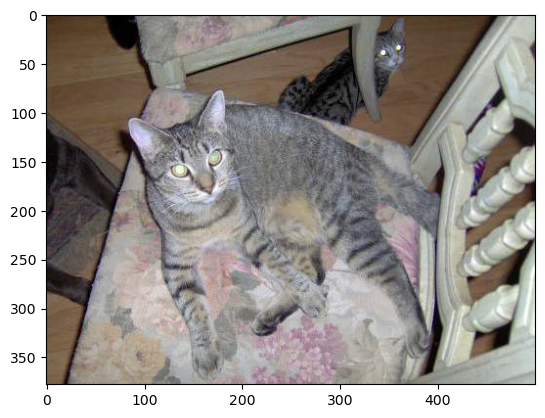

In [7]:
plt.imshow(image[0])

In [8]:
#Generating the augmented images
aug_iter = gen.flow(image)

In [9]:
#Get 10 samples from augmented images 
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

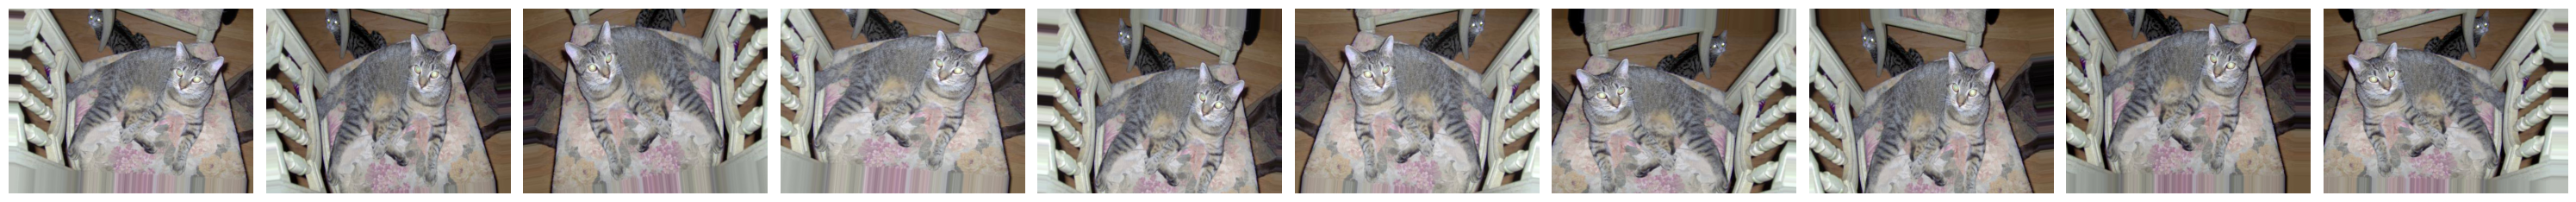

In [10]:
plotImages(aug_images)

In [11]:
#Save the augmented images
aug_iter = gen.flow(image, save_to_dir='data/dogs-vs-cats/train/cat', save_prefix='aug-image-', save_format='jpeg')